In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


**IMPLEMENTING THE CUSTOMER SEGMENTATION USING KMEANS CLUSTERING**

In [2]:
data = pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Here we can cluster the customers based on age , Income , Gender and Spending Score

Some more preprocessing before applying the kmeans

In [3]:
data.drop(columns =['CustomerID'] , axis=1 , inplace=True)
data.rename(columns={'Annual Income (k$)' : 'Annual_Income', 'Spending Score (1-100)' : 'Spending_Score'}, inplace = True)
print(data.head())

   Gender  Age  Annual_Income  Spending_Score
0    Male   19             15              39
1    Male   21             15              81
2  Female   20             16               6
3  Female   23             16              77
4  Female   31             17              40


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          200 non-null    object
 1   Age             200 non-null    int64 
 2   Annual_Income   200 non-null    int64 
 3   Spending_Score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


**PreAnalysis and Visualisation**

Clustering can happen based on these parameters

In [5]:
pred_cols = ['Age','Annual_Income','Spending_Score']

<AxesSubplot:xlabel='Annual_Income', ylabel='Spending_Score'>

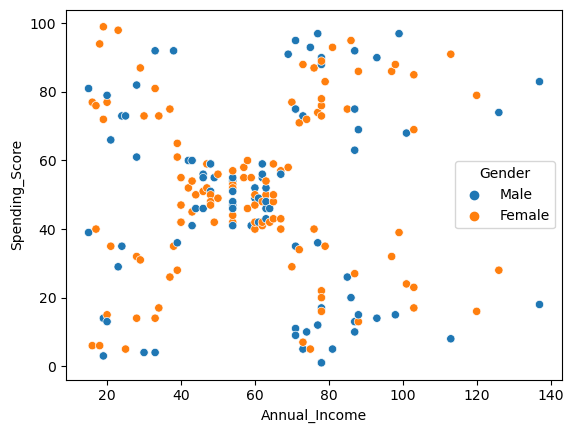

In [6]:
sns.scatterplot(data=data,x="Annual_Income",y="Spending_Score",hue="Gender")

We will be scaling the data to normalise the datapoints

In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=data.iloc[:,2:]
x_scaled=scaler.fit_transform(x)
print(x_scaled)

[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]
 [-1.66266033  1.00159627]
 [-1.62449091 -1.71591298]
 [-1.62449091  1.70038436]
 [-1.58632148 -1.83237767]
 [-1.58632148  0.84631002]
 [-1.58632148 -1.4053405 ]
 [-1.58632148  1.89449216]
 [-1.54815205 -1.36651894]
 [-1.54815205  1.04041783]
 [-1.54815205 -1.44416206]
 [-1.54815205  1.11806095]
 [-1.50998262 -0.59008772]
 [-1.50998262  0.61338066]
 [-1.43364376 -0.82301709]
 [-1.43364376  1.8556706 ]
 [-1.39547433 -0.59008772]
 [-1.39547433  0.88513158]
 [-1.3573049  -1.75473454]
 [-1.3573049   0.88513158]
 [-1.24279661 -1.4053405 ]
 [-1.24279661  1.23452563]
 [-1.24279661 -0.7065524 ]
 [-1.24279661  0.41927286]
 [-1.20462718 -0.74537397]
 [-1.20462718  1.42863343]
 [-1.16645776 -1.7935561 ]
 [-1.16645776  0.88513158]
 [-1.05194947 -1.7935561 ]
 [-1.05194947  1.62274124]
 [-1.05194947 -1.4053405 ]
 [-1.05194947  1.19570407]
 [-1.01378004 -1.28887582]
 

Trying the Elbow technique and getting the optimal K value

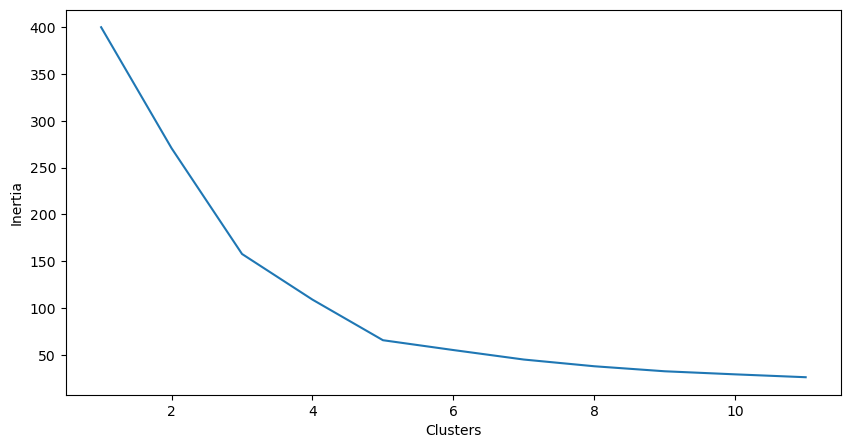

In [8]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

data['Gender'] = le.fit_transform(data['Gender'])

sse=[]
clusters=range(1,12)
for cluster in clusters:
    kmeans = KMeans(n_clusters=cluster, init='k-means++',random_state=42)
    kmeans.fit(x_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(clusters,sse)
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.show()

We notice from the above elbow plot that the optimal K value would be 5

In [9]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++')
kmeans.fit(x_scaled)

KMeans(n_clusters=5)

SSE of the model

In [10]:
kmeans.inertia_

65.56840815571681

After Clustering the records into cluster ... printing cluster labels

In [11]:
pred=kmeans.predict(x_scaled)
print(pred)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 0 4 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 0 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


**Evaluation**\
Silhouette Score returns the similarity of the datapoint within cluster compared to other clusters

In [12]:
from sklearn.metrics import silhouette_score
silhouette_score= silhouette_score(x_scaled,pred,metric="euclidean")
print(silhouette_score)

0.5546571631111091


In [13]:
#Appending the cluster label to the dataset
data['Cluster'] = pred
data

,Gender,Age,Annual_Income,Spending_Score,Cluster
0,1,19,15,39,4
1,1,21,15,81,3
2,0,20,16,6,4
3,0,23,16,77,3
4,0,31,17,40,4
...,...,...,...,...,...
195,0,35,120,79,2
196,0,45,126,28,1
197,1,32,126,74,2
198,1,32,137,18,1


<AxesSubplot:xlabel='Spending_Score', ylabel='Annual_Income'>

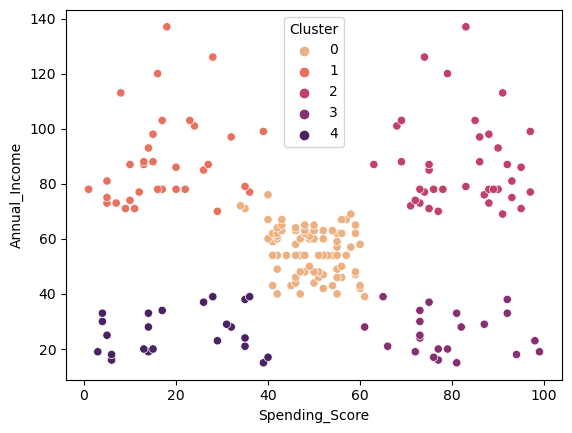

In [14]:
sns.scatterplot(x="Spending_Score",y="Annual_Income",hue ='Cluster',data=data,palette="flare")

Here the people records are split into various categories..\
 cat 0 : earn medium and spend medium \
 cat 1 : earn high and spend little more than medium \
 cat 2 : earn less and spend less \
 cat 3 : earn high and spend less \
 cat 4 : earn less and spend high 